In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [341]:
def parser(x):
    return datetime.datetime.strptime('19'+x, '%Y-%m')

series =pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',sep=';', header=0, parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
series=pd.DataFrame(series,columns=['Sales'])
#series.index = series.index.to_period('M')

In [327]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [328]:
series.dtypes

Sales    float64
dtype: object

In [329]:
series.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [330]:
series.isnull().sum()

Sales    0
dtype: int64

In [331]:
series.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

(array([693961., 694081., 694204., 694326., 694446., 694569., 694691.,
        694811., 694934., 695056.]),
 <a list of 10 Text major ticklabel objects>)

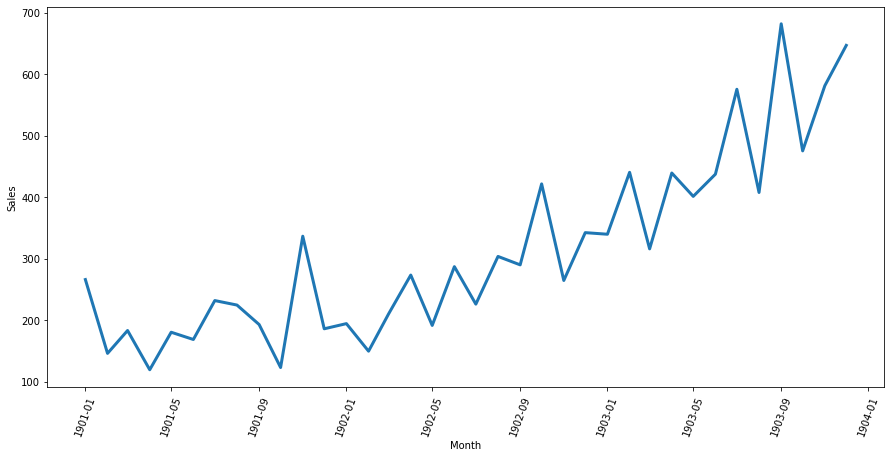

In [332]:
import seaborn as sns
fig=plt.figure(figsize=(15,7))
sns.lineplot(x=series.index , y=series.Sales,linewidth=3)
plt.xticks(rotation=70)

In [343]:
from statsmodels.tsa.stattools import adfuller , kpss
results=adfuller(series.Sales, regression='ctt')
print("ADF Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

result=kpss(series.Sales,regression='ct')
print("\nKPSS Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

ADF Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592

KPSS Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592


aaaa


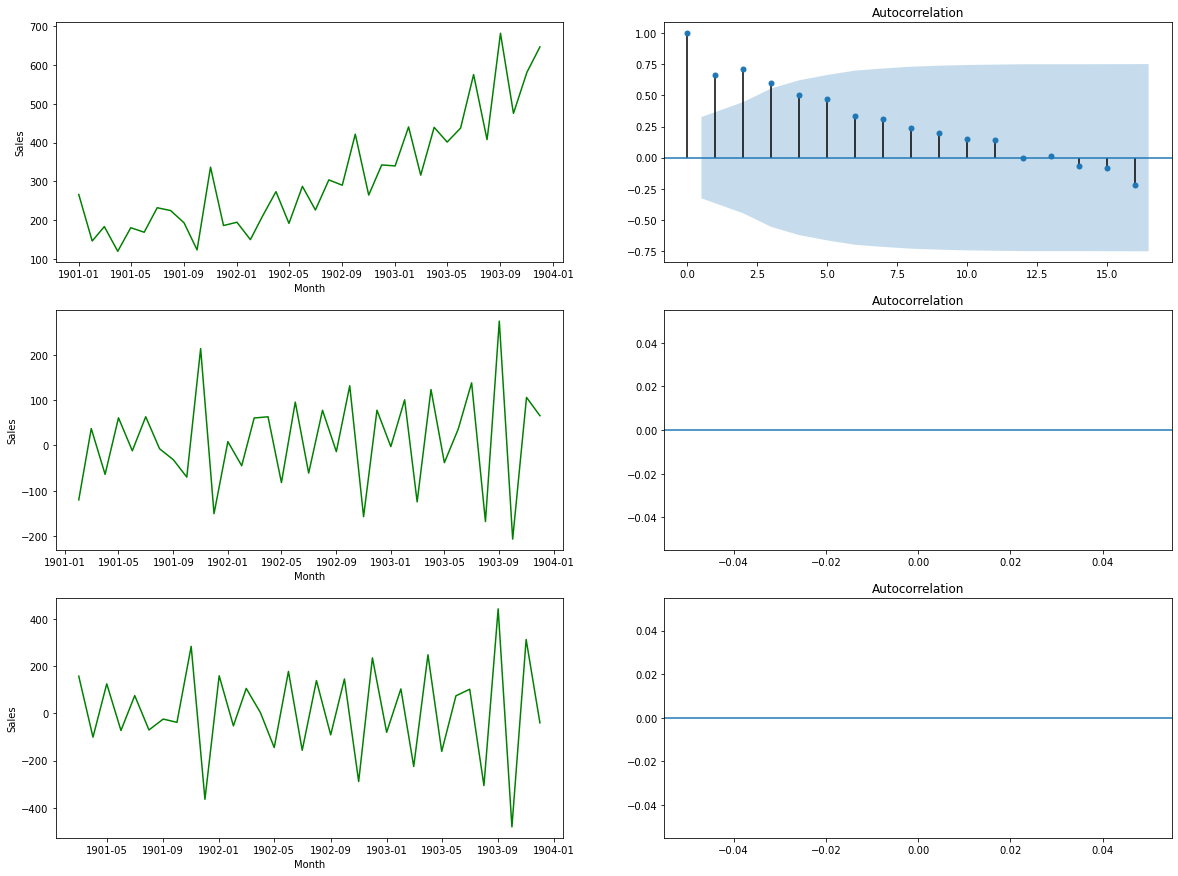

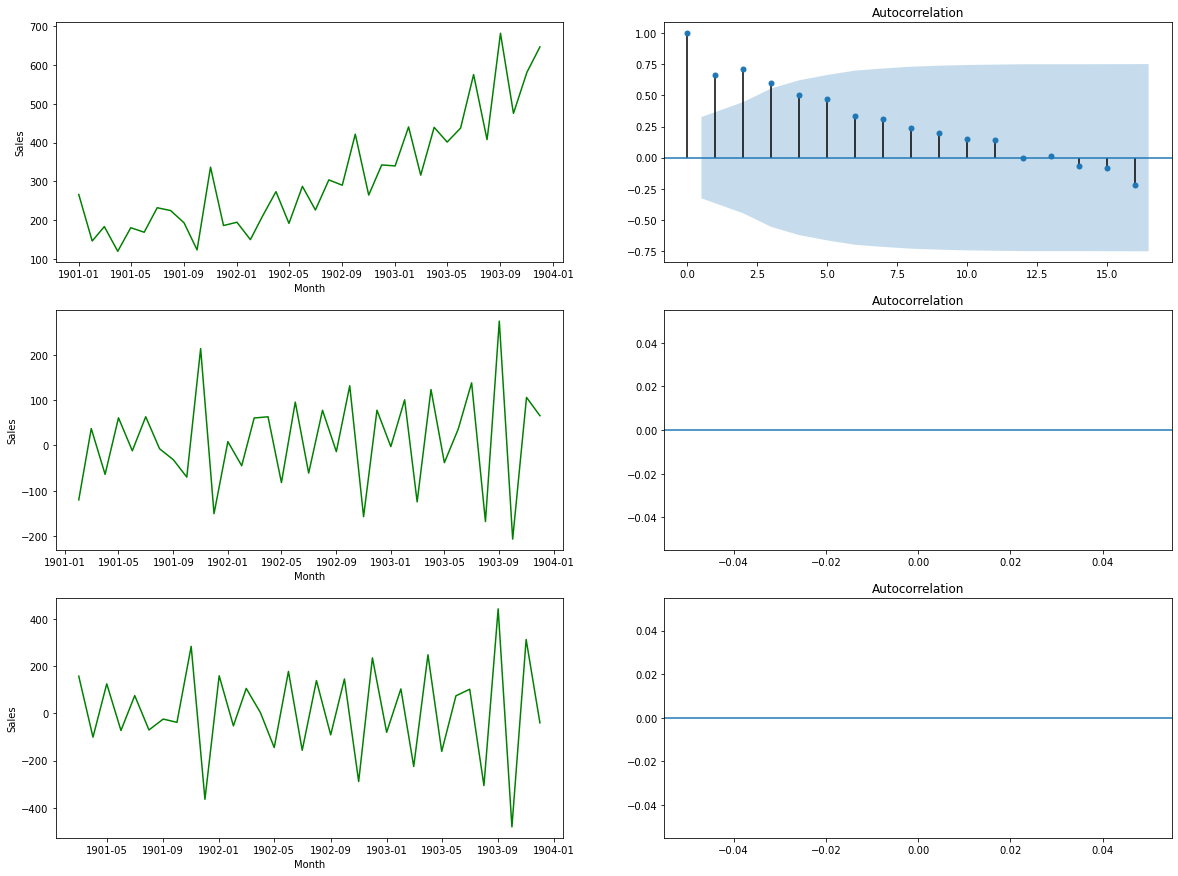

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
import seaborn as sns
fig,ax=plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x=series.index,y=series.Sales,ax=ax[0,0],color='g')
plot_acf(series.Sales,ax=ax[0,1])

sns.lineplot(x=series.index,y=series.Sales.diff(),ax=ax[1,0],color='g')
plot_acf(series.Sales.diff(),ax=ax[1,1])

sns.lineplot(x=series.index,y=series.Sales.diff().diff(),ax=ax[2,0],color='g')
plot_acf(series.diff().diff(),ax=ax[2,1])

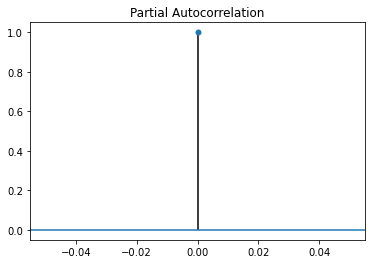

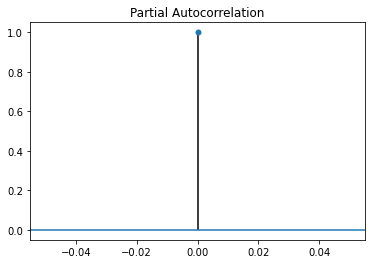

In [334]:
plot_pacf(series.Sales.diff())

In [347]:
train_end=datetime.date(1902,12,1)
test_end=datetime.date(1903,12,1)
series.index = series.index.to_period('M')
train_data=series.loc[:train_end]
test_data=series.loc[train_end+datetime.timedelta(days=31):test_end]

model_1=ARIMA(train_data,order=(1,1,1)).fit()
pred=model_1.forecast(steps=len(test_data))[0]
print(f"MSE : {mean_squared_error(pred,test_data)}")
pd.DataFrame(data={"predictions":pred ,"True Values":test_data.Sales,"Residuals":pred-test_data.Sales})


MSE : 22743.585517033778


,predictions,True Values,Residuals
Month,,,
1902-12,301.813944,342.3,-40.486056
1903-01,320.080724,339.7,-19.619276
1903-02,323.943448,440.4,-116.456552
1903-03,331.337522,315.9,15.437522
1903-04,337.865837,439.3,-101.434163
1903-05,344.606405,401.3,-56.693595
1903-06,351.294937,437.4,-86.105063
1903-07,357.996226,575.5,-217.503774
1903-08,364.694387,407.6,-42.905613


0   -16.748785
dtype: float64


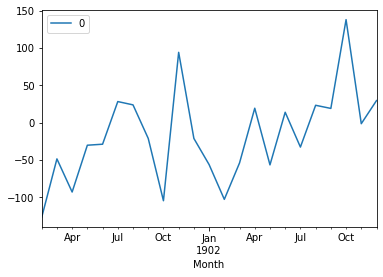

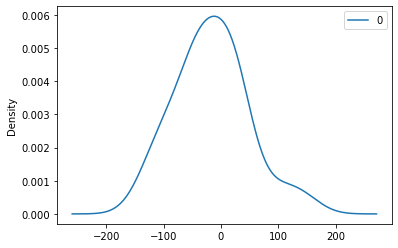

In [348]:
residuals=pd.DataFrame(model_1.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.mean())

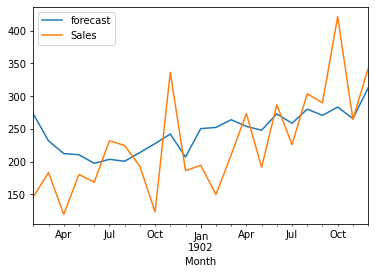

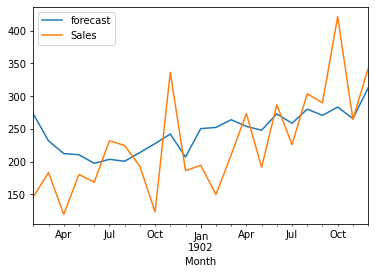

In [349]:
model_1.plot_predict(dynamic=False)

In [473]:
train_end=datetime.date(1902,12,1)
test_end=datetime.date(1903,12,1)
train_data=series.loc[:train_end]
test_data=series.loc[train_end+datetime.timedelta(days=31):test_end]

model_2=ARIMA(train_data,order=(4,2,1)).fit()
#pred=model_2.predict(start=test_data.index[0],end=test_data.index[-1],typ='levels')
#need for inverting if we used above method
pred=model_2.forecast(steps=len(test_data))[0]
print(f"RMSE : {mean_squared_error(pred,test_data)}")
pd.DataFrame(data={"predictions":pred ,"True Values":test_data.Sales,"Residuals":pred-test_data.Sales})


RMSE : 5104.090609959451


,predictions,True Values,Residuals
Month,,,
1903-01,354.296598,339.7,14.596598
1903-02,431.811412,440.4,-8.588588
1903-03,400.298540,315.9,84.398540
1903-04,420.826825,439.3,-18.473175
1903-05,443.740975,401.3,42.440975
1903-06,490.178911,437.4,52.778911
1903-07,505.079782,575.5,-70.420218
1903-08,522.577247,407.6,114.977247
1903-09,547.162634,682.0,-134.837366


0    16.884637
dtype: float64


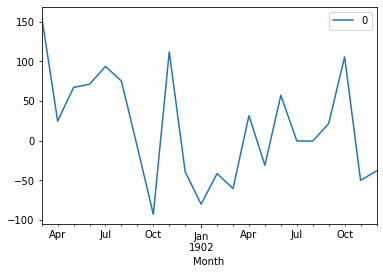

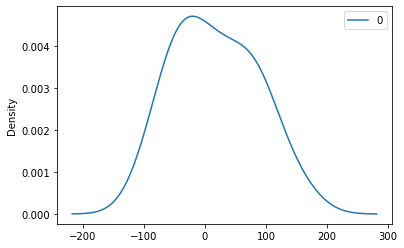

In [474]:
residuals=pd.DataFrame(model_2.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.mean())

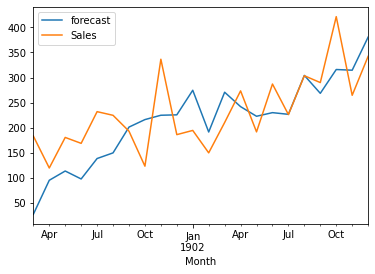

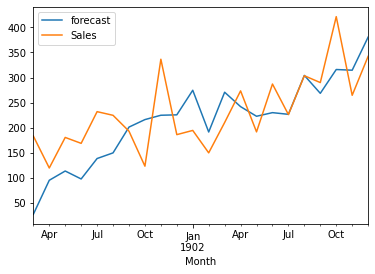

In [475]:
model_2.plot_predict(dynamic=False)

In [476]:
a=datetime.datetime(1905,1,1).strftime("%Y-%m-%d")
b=datetime.datetime(1904,5,1).strftime("%Y-%m-%d")
c=model_2.predict(end=a,typ='levels')
c.loc[b:a]

1904-05     795.069021
1904-06     830.013547
1904-07     866.560644
1904-08     902.990034
1904-09     939.686646
1904-10     977.815679
1904-11    1017.441921
1904-12    1057.787987
1905-01    1098.656109
Freq: M, dtype: float64

In [218]:
import pmdarima as pm
model=pm.auto_arima(series.Sales,start_p=0,start_q=0,test='adf',max_p=3,max_q=3,seasonal=False)
model.order

(1, 1, 2)

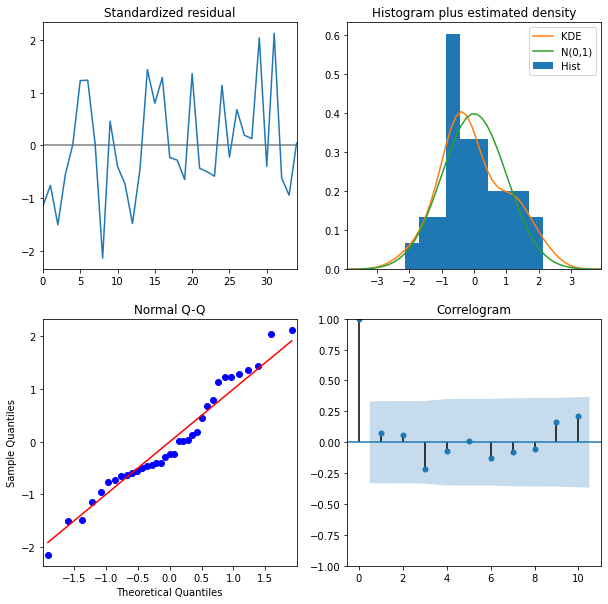

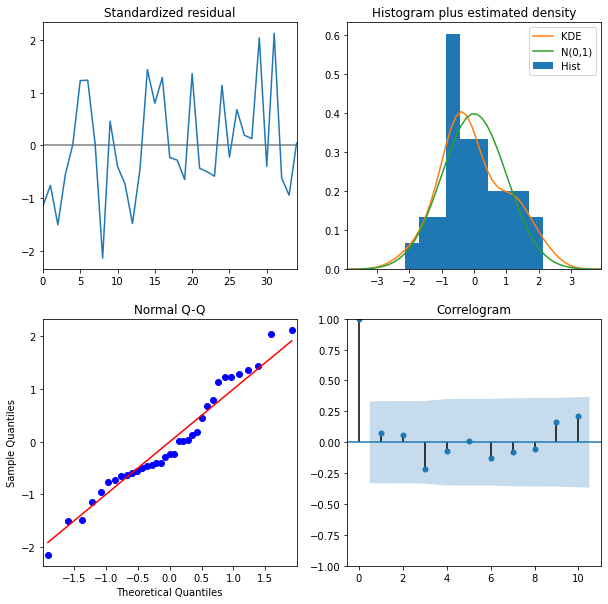

In [222]:
model.plot_diagnostics(figsize=(10,10))

In [437]:
series.index

PeriodIndex(['1901-01', '1901-02', '1901-03', '1901-04', '1901-05', '1901-06',
             '1901-07', '1901-08', '1901-09', '1901-10', '1901-11', '1901-12',
             '1902-01', '1902-02', '1902-03', '1902-04', '1902-05', '1902-06',
             '1902-07', '1902-08', '1902-09', '1902-10', '1902-11', '1902-12',
             '1903-01', '1903-02', '1903-03', '1903-04', '1903-05', '1903-06',
             '1903-07', '1903-08', '1903-09', '1903-10', '1903-11', '1903-12'],
            dtype='period[M]', name='Month', freq='M')

In [477]:
#Rolling Forecast

#we want forecast between , say a and b
#Eg. we want forecasts from 1905-05 to 1906-05
b=(datetime.datetime(1906,5,1)+datetime.timedelta(days=31)).strftime("%Y-%m-%d")
a=datetime.datetime(1905,5,1).strftime("%Y-%m-%d")
FMT = '%Y-%m-%d'
time_diff = datetime.datetime.strptime(b, FMT) - datetime.datetime.strptime(a, FMT)
time_diff=np.round(time_diff.days/30)
print(time_diff)

end_date=b
start_date=datetime.datetime(1904,1,1).strftime("%Y-%m-%d")
FMT = '%Y-%m-%d'
tdelta = datetime.datetime.strptime(end_date, FMT) - datetime.datetime.strptime(start_date, FMT)
print(f"Timedelta : {np.round(tdelta.days/30)}")

history = [x for x in series.Sales]
predictions = []
for t in range(int(np.round(tdelta.days/30))):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit()
    yhat= model_fit.forecast()[0]
    predictions.append(yhat[0])
    history.append(yhat)
    
d=pd.DataFrame(data={"Predictions":predictions},index=pd.date_range(start_date,end_date,freq='M'))
d.index=d.index.to_period('M')
d

13.0
Timedelta : 29.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


,Predictions
1904-01,620.114906
1904-02,721.363669
1904-03,650.432185
1904-04,768.672577
1904-05,756.169485
1904-06,808.361244
1904-07,837.635603
1904-08,856.579151
1904-09,921.910003
1904-10,930.925067


In [478]:
#Required forecasts
d.iloc[-int(time_diff):]

,Predictions
1905-05,1219.639626
1905-06,1270.702219
1905-07,1310.388471
1905-08,1358.000117
1905-09,1404.336252
1905-10,1450.330912
1905-11,1500.884934
1905-12,1547.371176
1906-01,1599.510874
1906-02,1648.944299
